In [1]:
from google.colab import drive
drive.mount('/content/drive' ,force_remount=True)

Mounted at /content/drive


In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Preprocessing :
from sklearn import preprocessing 
from sklearn.preprocessing import  StandardScaler, LabelEncoder, Normalizer 

from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay, classification_report,accuracy_score

In [3]:
# Read datasets
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/Mall_Customers.csv")
dataset.shape
#dataset.head()
print(dataset.shape)
print(dataset)

(200, 5)
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [8]:
label_encoder = preprocessing.LabelEncoder()
dataset['Gender'] = label_encoder.fit_transform(dataset['Gender'])
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


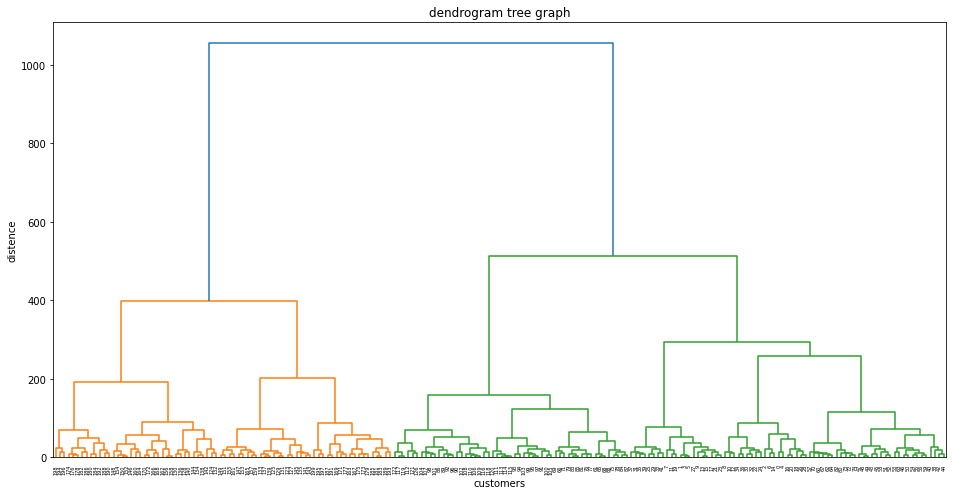

In [13]:
#data Visualization
import scipy.cluster.hierarchy as clus

plt.figure(1, figsize=(16,8))
dendrogram=clus.dendrogram(clus.linkage(dataset, method='ward'))


plt.title('dendrogram tree graph')
plt.xlabel('customers')
plt.ylabel('distence')
plt.show()

In [15]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean',linkage='average')
y_means = model.fit_predict(dataset)
y_means

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

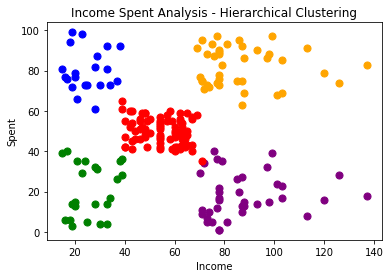

In [16]:
X = dataset.iloc[:, [3,4]].values

plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s=50, c='purple', label='Cluster 1')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s=50, c='orange', label='Cluster 2') 
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], s=50, c='red', label = 'Cluster 3')
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1], s=50, c='green', label ='Cluster 4')
plt.scatter(X[y_means == 4, 0], X[y_means == 4, 1], s=50, c='blue', label='Cluster 5')

plt.title('Income Spent Analysis - Hierarchical Clustering')
plt.xlabel('Income')
plt.ylabel('Spent')
plt.show()